<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment2_02_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


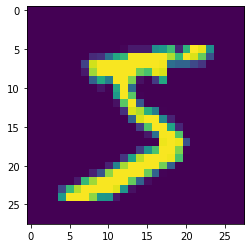

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#Use GAP, BN, LRscheduler, dropout, callbacks
model.add(Convolution2D(31, 3, 3, activation='relu', input_shape=(28,28,1), name="FirstConv"))#26
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu'))#24
model.add(Dropout(0.1))
model.add(Convolution2D(33, 3, 3, activation='relu'))#22
model.add(Dropout(0.1))

model.add(MaxPooling2D(2, 2))#11
model.add(Convolution2D(12, 1, activation='relu'))#11

model.add(Convolution2D(62, kernel_size=(3, 3), activation='relu'))#9
model.add(Dropout(0.1))
model.add(Convolution2D(63, kernel_size=(3, 3), activation='relu'))#7
#model.add(Dropout(0.1))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))#5
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(31, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="FirstConv")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConv (Conv2D)           (None, 26, 26, 31)        310       
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 31)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        8960      
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 33)        9537      
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 33)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 33)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

snapshot_filepath = "/opt/saved_weight_file.hdf5"
cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
CALLBACKS = [cp_callback]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks = CALLBACKS)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.1539 - acc: 0.9522 - val_loss: 0.0462 - val_acc: 0.9856

Epoch 00001: val_acc improved from -inf to 0.98560, saving model to /opt/saved_weight_file.hdf5
Epoch 2/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.0500 - acc: 0.9847 - val_loss: 0.0312 - val_acc: 0.9893

Epoch 00002: val_acc improved from 0.98560 to 0.98930, saving model to /opt/saved_weight_file.hdf5
Epoch 3/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0371 - acc: 0.9884 - val_loss: 0.0326 - val_acc: 0.9909

Epoch 00003: val_acc improved from 0.98930 to 0.99090, saving model to /opt/saved_weight_file.hdf5
Epoch 4/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0298 - acc: 0.9909 - val_loss: 0.0759 - val_acc: 0.9812

Epoch 00004: val_acc did not improve from 0.99090
Epoch 5/20
60000/60000 [======================

In [0]:
model.load_weights(snapshot_filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.028812028533693, 0.9944]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.3937789e-22 1.3499491e-17 6.5762479e-16 5.4786070e-16 5.3618327e-23
  8.0828646e-19 2.9058491e-32 1.0000000e+00 5.5432576e-21 1.2107983e-16]
 [2.1024632e-17 1.0523616e-15 1.0000000e+00 7.1887837e-24 2.3746918e-16
  2.0155837e-22 3.0160936e-14 3.7676772e-21 8.0765544e-17 2.3172240e-23]
 [2.6458755e-14 1.0000000e+00 1.0224827e-12 1.6496524e-15 1.7424104e-11
  1.1423338e-12 8.0079305e-16 4.6966896e-11 5.5240501e-09 6.9515018e-14]
 [1.0000000e+00 8.3315014e-17 9.9499499e-11 3.7251460e-10 4.3188120e-11
  7.1901748e-11 5.1181575e-09 8.8323077e-13 3.8080102e-11 3.4552560e-08]
 [2.4183251e-16 4.3098294e-17 1.1630693e-14 3.8779977e-17 1.0000000e+00
  3.3542236e-15 4.9965483e-19 1.0640448e-13 6.3274314e-15 6.8013949e-11]
 [6.6822139e-13 1.0000000e+00 3.0066569e-10 2.4651171e-14 3.8651495e-09
  6.8661649e-14 4.4640097e-16 2.0568952e-10 1.3600112e-08 9.6629052e-13]
 [4.5591960e-24 3.3008332e-09 4.5266389e-14 3.2670186e-19 1.0000000e+00
  4.3123266e-18 1.6368478e-20 2.3525524e-12 2.3136784e-11 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

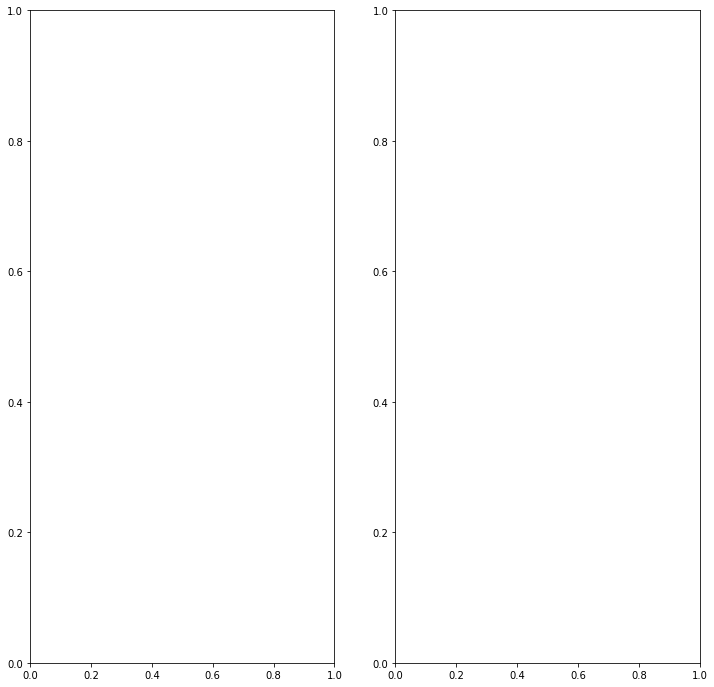

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()